# Setup

In [1]:
import locale
locale.setlocale(locale.LC_ALL, 'sv_SE')

%matplotlib inline
from pprint import pprint

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn

seaborn.set_theme()
seaborn.set_style('ticks')
seaborn.despine()

matplotlib.rcParams['figure.dpi'] = 300

<Figure size 640x480 with 0 Axes>

# A-tax vs gross monthly salary

A simple plot of the tax deduction (per month) as a function of gross monthly salary.

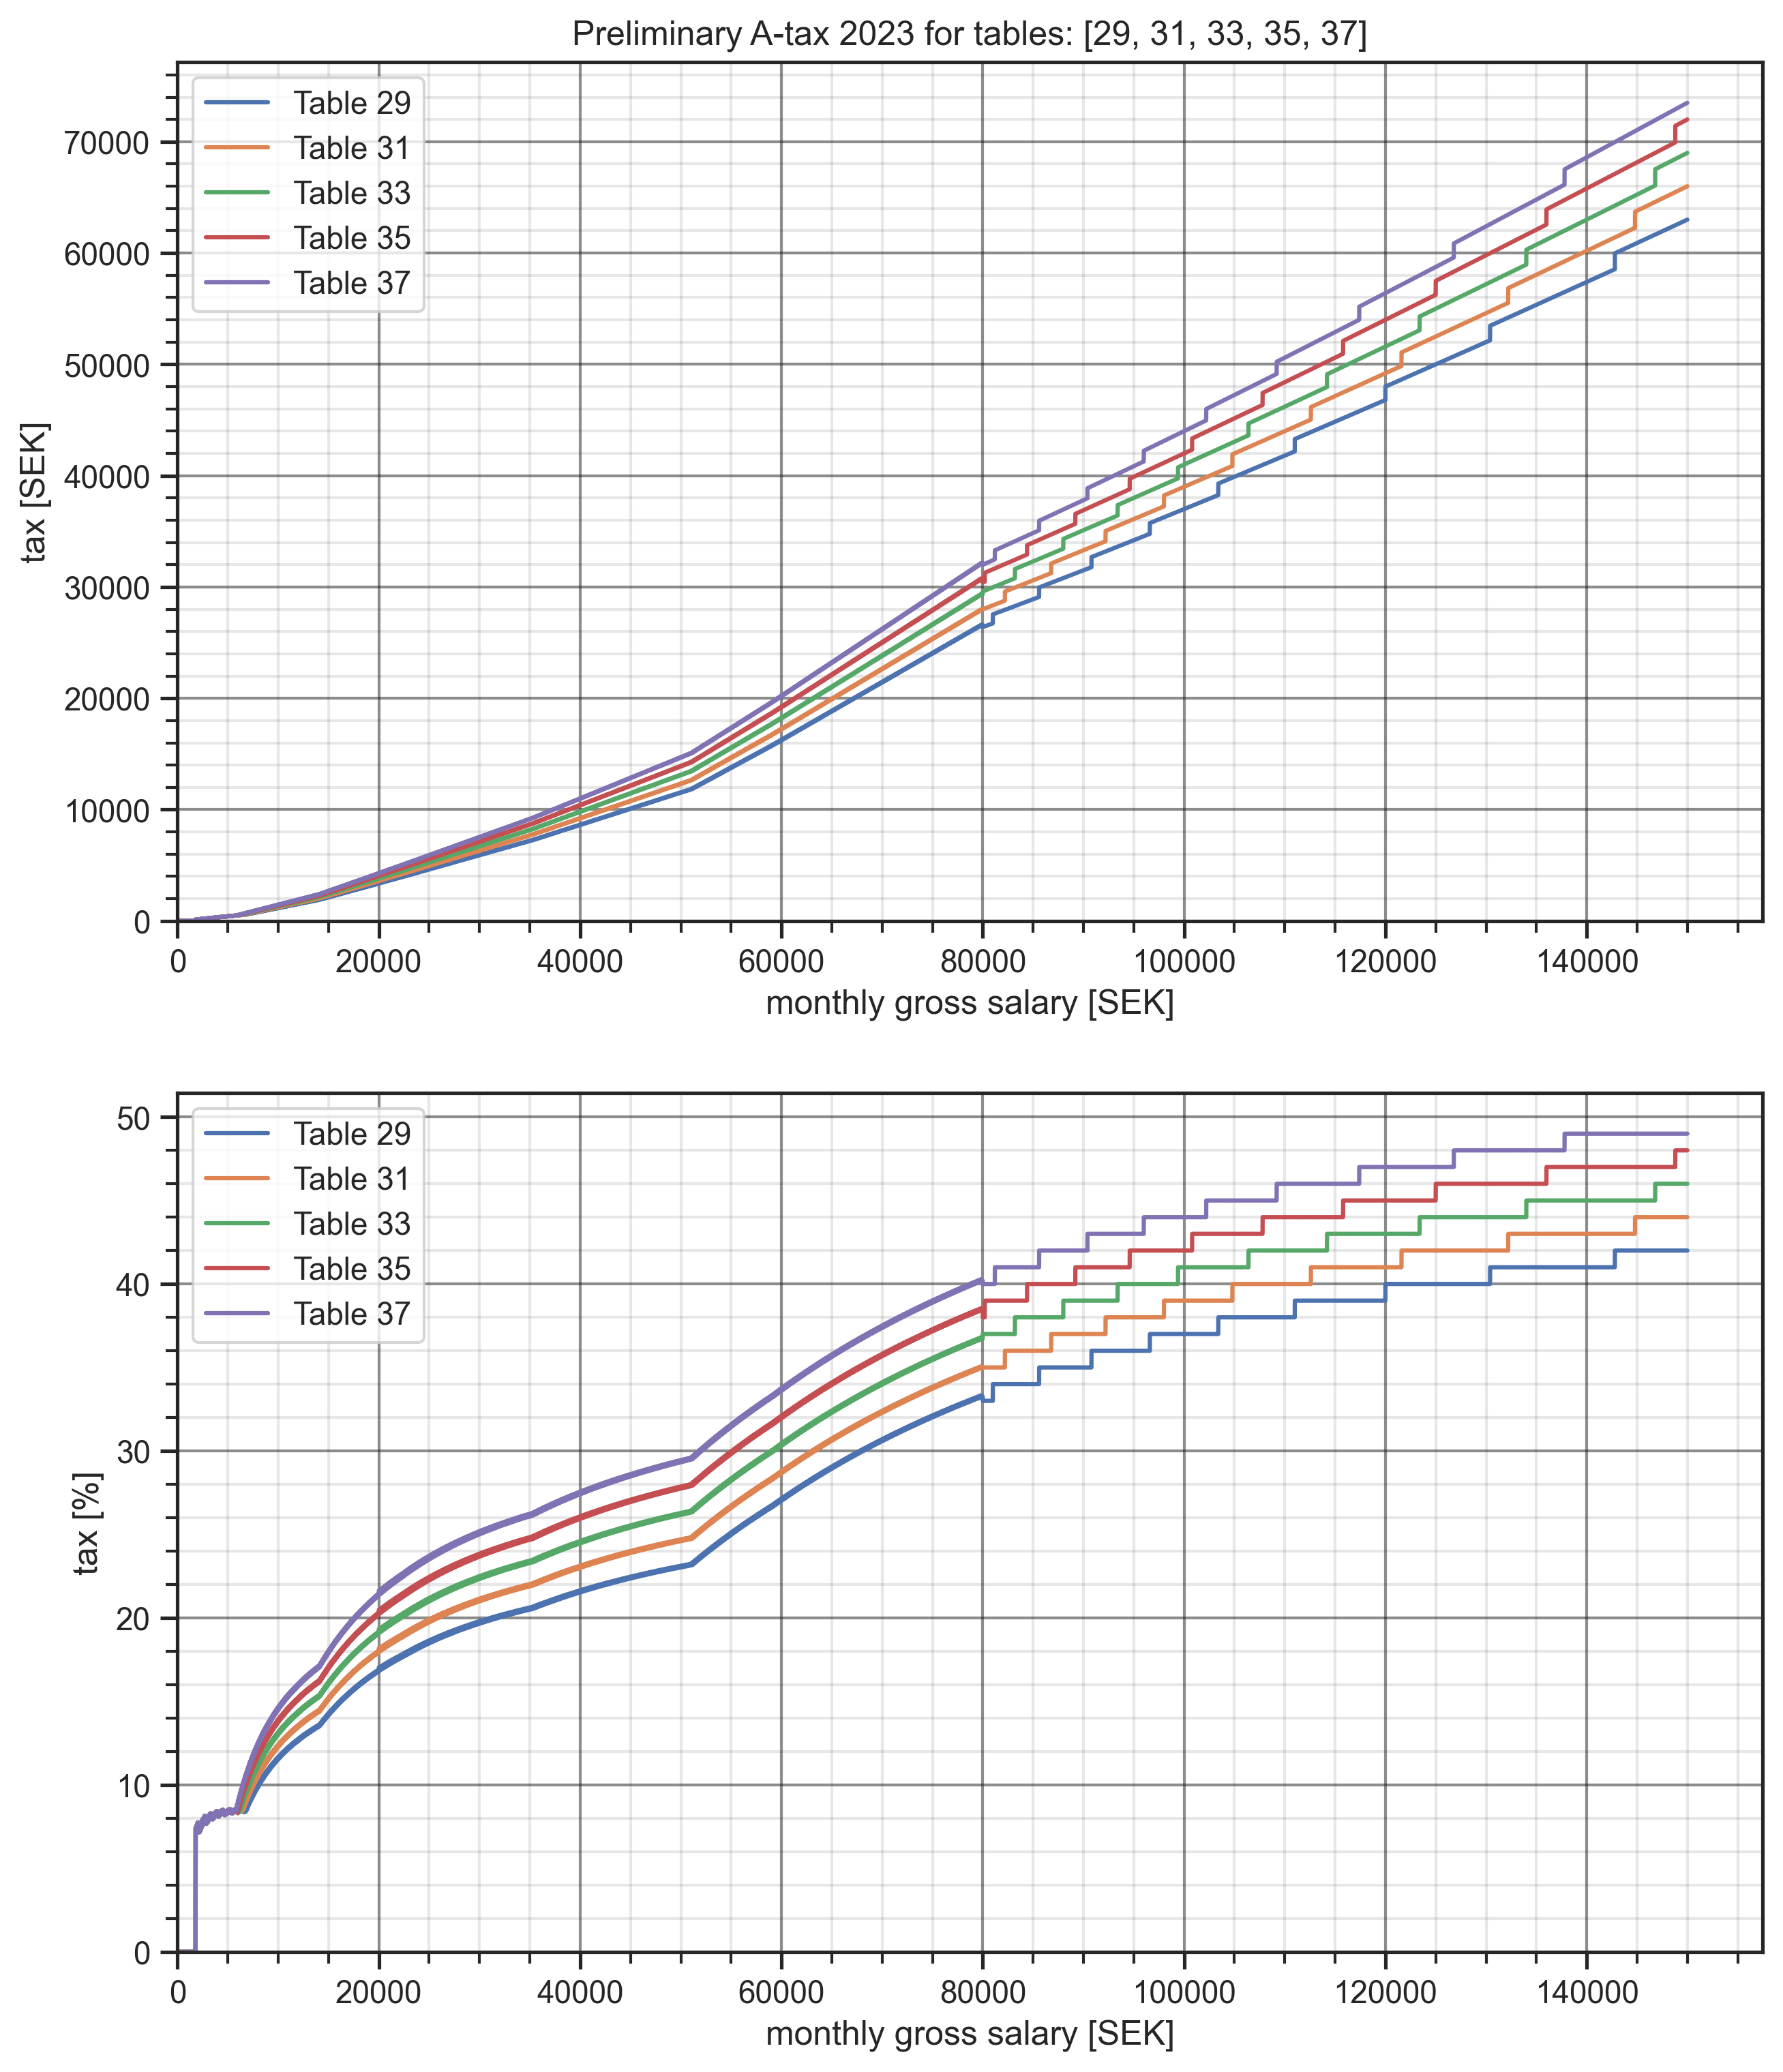

In [2]:
from atax import ATax
INCOME_YEAR = 2023
TAX_TABLE_NUMBERS = [29, 31, 33, 35, 37]
monthly_salary = range(1, 150000, 10)
atax_tables = dict()
for table_number in TAX_TABLE_NUMBERS:
    table=ATax(table_number=table_number, income_year=INCOME_YEAR)
    atax_tables[table_number] = dict(
        atax=[table(s) for s in monthly_salary],
        atax_ratio=[table(s) * 100.0 / s for s in monthly_salary],
    )

plt.figure(figsize=(10, 12), facecolor='white')

plt.subplot(2,1,1)
for table_number, data in atax_tables.items():
    plt.plot(monthly_salary, data['atax'], label=f'Table {table_number}')
plt.title(f'Preliminary A-tax {INCOME_YEAR} for tables: {TAX_TABLE_NUMBERS}')
plt.xlabel('monthly gross salary [SEK]')
plt.ylabel('tax [SEK]')
plt.gca().set_ylim(ymin=0)
plt.gca().set_xlim(xmin=0)
plt.grid(visible=True, which='major', color='k', linestyle='-', alpha=0.5)
plt.grid(visible=True, which='minor', color='k', linestyle='-', alpha=0.1)
plt.minorticks_on()
plt.legend()

plt.subplot(2,1,2)
for table_number, data in atax_tables.items():
    plt.plot(monthly_salary, data['atax_ratio'], label=f'Table {table_number}')
plt.xlabel('monthly gross salary [SEK]')
plt.ylabel('tax [%]')
plt.gca().set_ylim(ymin=0)
plt.gca().set_xlim(xmin=0)
plt.grid(visible=True, which='major', color='k', linestyle='-', alpha=0.5)
plt.grid(visible=True, which='minor', color='k', linestyle='-', alpha=0.1)
plt.minorticks_on()
plt.legend();


# A-tax for two age groups

A-tax for salary differes depending on the age of the individual.

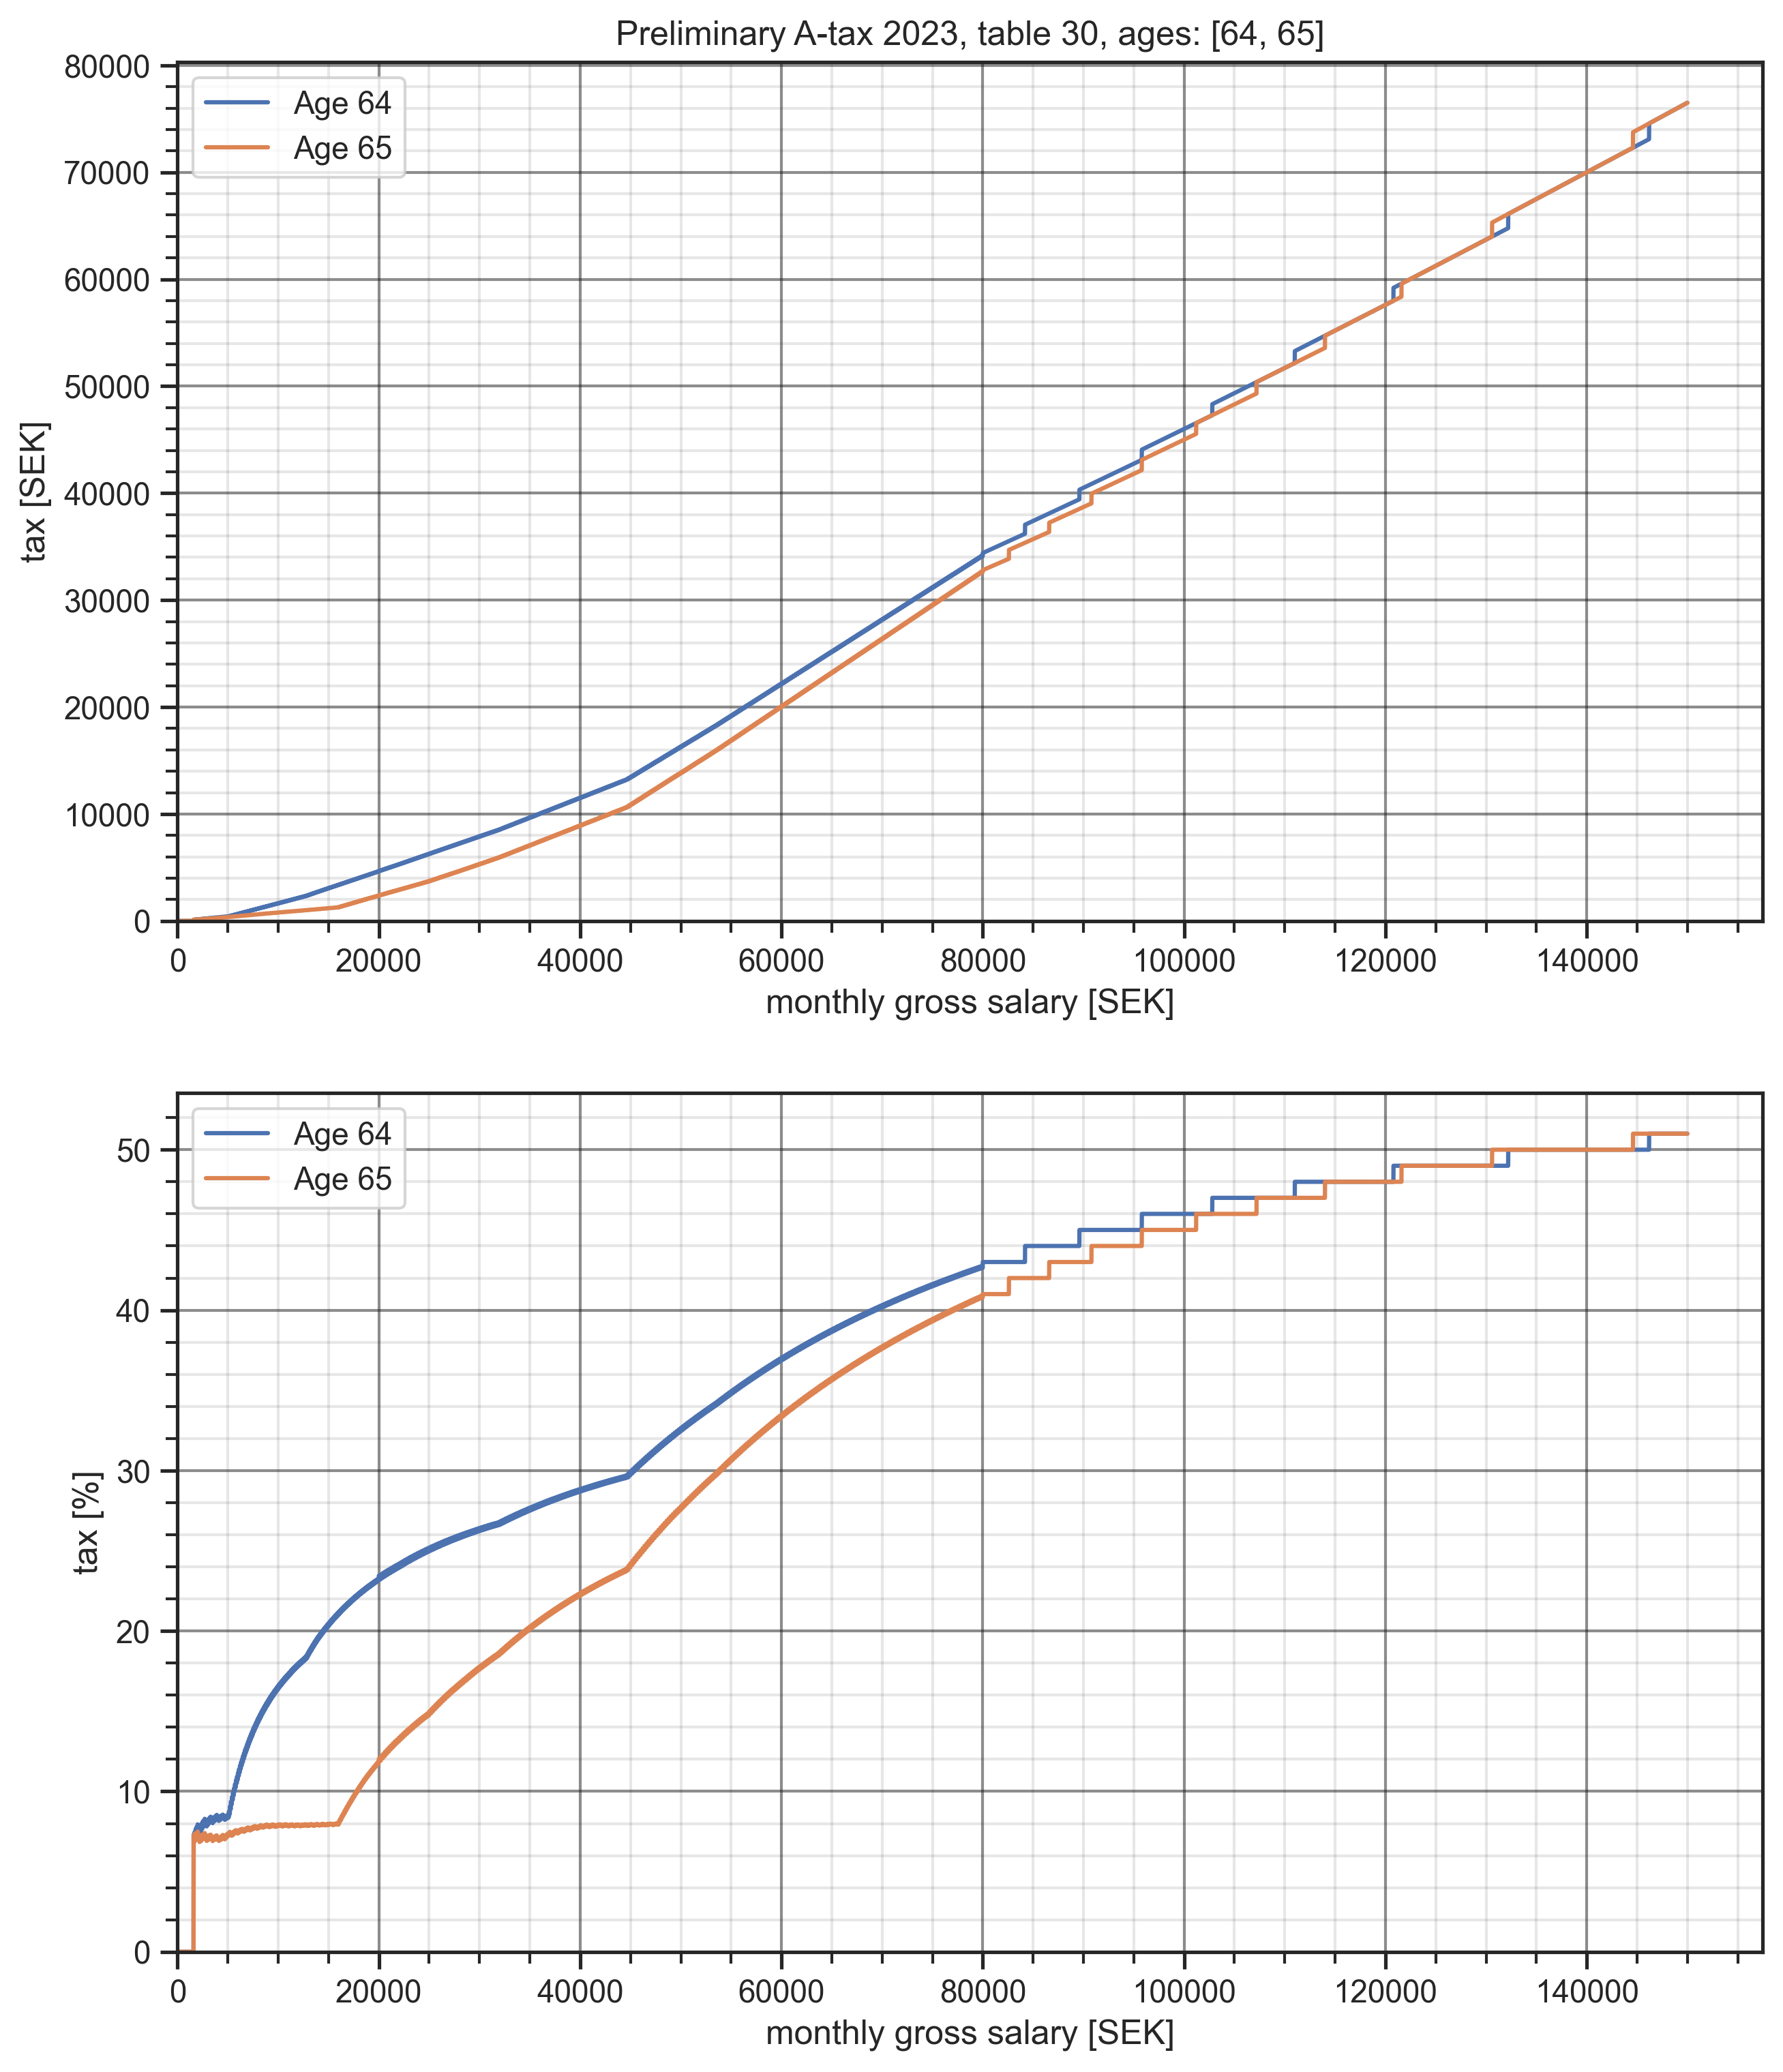

In [3]:
from atax import ATax
TAX_TABLE_NO = 30
AGES = [64, 65]
monthly_salary = range(1, 150000, 10)
atax_tables = dict()
for age in AGES:
    table=ATax(table_number=table_number, age=age, income_year=2021)
    atax_tables[age] = dict(
        atax=[table(s) for s in monthly_salary],
        atax_ratio=[table(s) * 100.0 / s for s in monthly_salary],
    )

plt.figure(figsize=(10, 12), facecolor='white')

plt.subplot(2,1,1)
for age, data in atax_tables.items():
    plt.plot(monthly_salary, data['atax'], label=f'Age {age}')
plt.title(f'Preliminary A-tax {INCOME_YEAR}, table {TAX_TABLE_NO}, ages: {AGES}')
plt.xlabel('monthly gross salary [SEK]')
plt.ylabel('tax [SEK]')
plt.gca().set_ylim(ymin=0)
plt.gca().set_xlim(xmin=0)
plt.grid(visible=True, which='major', color='k', linestyle='-', alpha=0.5)
plt.grid(visible=True, which='minor', color='k', linestyle='-', alpha=0.1)
plt.minorticks_on()
plt.legend()

plt.subplot(2,1,2)
for age, data in atax_tables.items():
    plt.plot(monthly_salary, data['atax_ratio'], label=f'Age {age}')
plt.xlabel('monthly gross salary [SEK]')
plt.ylabel('tax [%]')
plt.gca().set_ylim(ymin=0)
plt.gca().set_xlim(xmin=0)
plt.grid(visible=True, which='major', color='k', linestyle='-', alpha=0.5)
plt.grid(visible=True, which='minor', color='k', linestyle='-', alpha=0.1)
plt.minorticks_on()
plt.legend();
